# Importing important libraries

In [31]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.datasets import make_blobs

# Loading the training dataset

For demonstration purposes, let us take a 2 dimensional dataset with two features (Feature_1 and Feature_2) and consisting of four clusters (Cluster A, Cluster B, Cluster C and Cluster D).

In [32]:
X,Y=make_blobs(n_samples=800,centers=4,random_state=42)

# Visualising the dataset

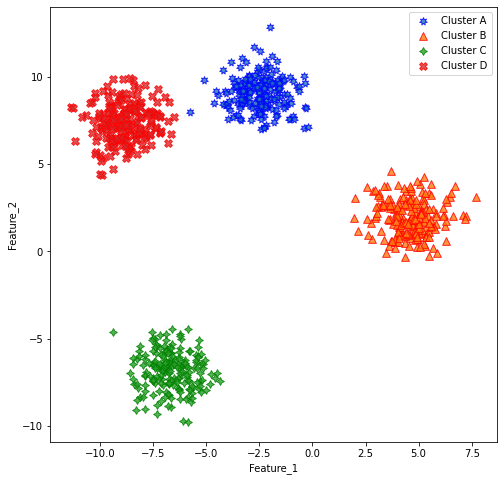

In [33]:
plt.figure(figsize=(8,8))
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.scatter(X[Y==0][:,0],X[Y==0][:,1], label="Cluster A", marker=(7,1,0), edgecolor = "b", s = 60, alpha = 0.8)
plt.scatter(X[Y==1][:,0],X[Y==1][:,1], label="Cluster B", marker="^", edgecolor = "r", s =60, alpha = 0.8)
plt.scatter(X[Y==2][:,0],X[Y==2][:,1], label="Cluster C", marker=(4,1,0), edgecolor = "g", s = 60, alpha = 0.8)
plt.scatter(X[Y==3][:,0],X[Y==3][:,1], label="Cluster D", marker="X", edgecolor = "red", s =60, alpha = 0.8)
plt.legend()
plt.show()

# Machine Learning Model

## Defining the model

In [34]:
class KMeans:
    def __init__(self,X,Y,k):
        self.X=X
        self.Y=Y
        self.k=k
        self.loss = None
        self.clusters={}
        self.loss_list = []
        self.clusters_list = []
        for i in range(self.k):
            np.random.seed(42)
            center=10*(2*np.random.random((self.X.shape[1],))-1)
            points=[]
            self.clusters[i]={'center':center,'points':points}
            
    def distance(self,x1,x2):
        return(np.sqrt(np.sum((x1-x2)**2)))
    
    def Appending_Points(self):
        for point in self.X:
            dist=[]
            for i in range(self.k):
                dist.append(self.distance(point,self.clusters[i]['center']))
            self.clusters[np.argmin(dist)]['points'].append(point)
            self.loss += np.min(dist)
        return(self.clusters)
        
    def updating_clusters(self):
        for i in range(self.k):
            pts=np.array(self.clusters[i]['points'])
            if pts.shape[0]>0:
                self.clusters[i]['center']=pts.mean(axis=0)
                self.clusters[i]['points']=[]
        return(self.clusters)
        
    def n_centers(self):
        for _ in range(30):
            self.loss = 0
            self.clusters=self.Appending_Points()
            self.clusters=self.updating_clusters()
            self.clusters_list.append([self.clusters[i]["center"]for i in self.clusters.keys()])
            self.loss_list.append(self.loss)
            if len(self.loss_list) > 2 and self.loss == self.loss_list[-2]:
                break
        return(self.clusters_list, self.loss_list)

## Training the model

### The loss here represents the sum of distances of all points from its closest cluster centre

In [35]:
Kmeans=KMeans(X,Y,4)
clusters_list, loss_list = Kmeans.n_centers()

## Visualising the loss

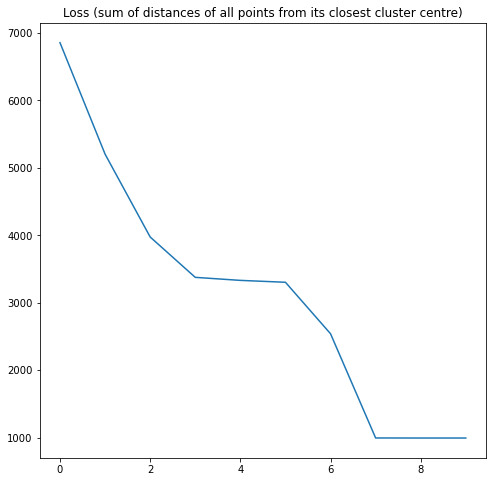

In [36]:
plt.figure(figsize=(8,8))
plt.plot(loss_list)
plt.title("Loss (sum of distances of all points from its closest cluster centre)")
plt.show()

## Visualising the cluster centres over iterations

## Plotting the final cluster centers

In [38]:
# For Contributing, refer to expectedoutput4.html in the expected outputs folder.

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=X[Y==0][:,0],
    y=X[Y==0][:,1],
    name="Class A",
    mode="markers",
    marker_color='rgba(84, 138, 252, 0.65)',
    marker_line_color='rgba(26, 9, 243, 0.8)',
    marker_size = 10,
    marker_line_width = 1,
    marker_symbol='hexagram',
    hovertemplate = 'Feature_1: %{x:.5f} <br />Feature_2: %{y:.5f}<extra></extra>, Class A<extra></extra>',
))

fig.add_trace(go.Scatter(
    x=X[Y==1][:,0],
    y=X[Y==1][:,1],
    name="Class B",
    mode="markers",
    marker_color='rgba(255, 117, 0, 0.65)',
    marker_line_color='rgba(255, 73, 0, 1)',
    marker_size = 10,
    marker_line_width = 1,
    marker_symbol='star-triangle-up',
    hovertemplate = 'Feature_1: %{x:.5f} <br />Feature_2: %{y:.5f}<extra></extra>, Class B<extra></extra>'
))

fig.add_trace(go.Scatter(
    x=X[Y==2][:,0],
    y=X[Y==2][:,1],
    name="Class C",
    mode="markers",
    marker_color='rgba(23, 156, 2, 0.65)',
    marker_line_color='rgba(23, 156, 2, 1)',
    marker_size = 10,
    marker_line_width = 1,
    marker_symbol='star-diamond',
    hovertemplate = 'Feature_1: %{x:.5f} <br />Feature_2: %{y:.5f}<extra></extra>, Class C<extra></extra>'
))

fig.add_trace(go.Scatter(
    x=X[Y==3][:,0],
    y=X[Y==3][:,1],
    name="Class D",
    mode="markers",
    marker_color='rgba(255,116,107,0.65)',
    marker_line_color='rgba(178, 59, 61, 1)',
    marker_size = 10,
    marker_line_width = 1,
    marker_symbol='x',
    hovertemplate = 'Feature_1: %{x:.5f} <br />Feature_2: %{y:.5f}<extra></extra>, Class D<extra></extra>'
))

fig.add_trace(go.Scatter(
    x=[i[0] for i in clusters_list[-1]],
    y=[i[1] for i in clusters_list[-1]],
    name="Cluster center",
    mode="markers",
    marker_color='black',
    hoverinfo='skip'
))

fig.update_layout(
    title="Visualization of the final cluster centers",
    xaxis_title="Feature_2",
    yaxis_title="Feature_1",
    legend_title="",
    width=800,
    height=800,
)

fig.show()